<a href="https://colab.research.google.com/github/RahulkMathur/Advance_Data_Science_Course-Intellipaat-/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [18]:
#loading datset
df= pd.read_csv("/content/heart.csv")
df
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
#Data Exploration
df['target'].value_counts()

,count
target,
1,165
0,138


In [20]:
df.shape

(303, 14)

/tmp/ipython-input-23-1255949059.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data = df, palette = 'hls')


<Axes: xlabel='target', ylabel='count'>

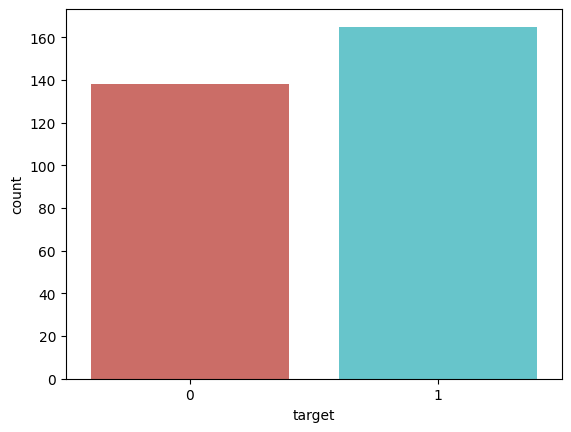

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(X='target', data = df, palette = 'hls')

In [27]:
#Split the data into features (X) and target (y) labels sets

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [30]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [35]:
#Split the data into a training and test set.
#import module to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [51]:
#Create and train the model
#Import module for fitting

from sklearn.linear_model import LogisticRegression

# Create instance  (i.e, object) of logistic Regression

logR = LogisticRegression()
logR.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
# Predicting the test set results

y_pred = logR.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [53]:
#Calculationg the Accuracy

print('Accuracy: %d', (logR.score(X_test,y_test)))

Accuracy: %d 0.7704918032786885


In [58]:
#Evaluate model using Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[20 10]
 [ 4 27]]


In [ ]:
# interpretations -
# 27 True negative (actual = 0, predict = 0)
# 10 - False Positve (actual= , predict = )